In [1]:
import torch, os, argparse
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
import sys
import sigpy as sp

In [2]:
def display(x, vmax=None):
    x = x[0][0] + 1j*x[0][1]
    x = np.array(x.cpu(), dtype=np.complex64)

    if vmax==None:
        plt.imshow(np.abs(x), cmap='gray')
    else:
        plt.imshow(np.abs(x), cmap='gray',vmax=vmax)
    
    plt.gca().invert_yaxis()
    plt.xlabel('doppler')
    plt.ylabel('range')

def display_cmplx(x, vmax=None):
    x = np.array(x.cpu(), dtype=np.complex64)

    if vmax==None:
        plt.imshow(np.abs(x), cmap='gray')
    else:
        plt.imshow(np.abs(x), cmap='gray',vmax=vmax)
    
    plt.gca().invert_yaxis()
    plt.xlabel('doppler')
    plt.ylabel('range')

In [3]:
def inference_fft(contents):
    original = contents['original_image']
    original = original[0] + 1j*original[1]

    plt.figure(figsize=(6, 6))
    plt.title('original image')
    plt.axis('off')
    plt.imshow(np.abs(original), cmap='gray')
    plt.gca().invert_yaxis()

    plt.figure(figsize=(6, 6))
    plt.title('IFFT original image')
    plt.axis('off')
    image = contents['images'][0]
    display(torch.tensor(sp.ifft(np.array(image.cpu()), axes=(-1,-2))))
    plt.gca().invert_yaxis()

    plt.figure(figsize=(6, 6))
    plt.title('input image - sigma: ' + str(contents['sigmas'][0]))
    plt.axis('off')
    display(contents['images'][0])

    plt.figure(figsize=(6, 6))
    plt.title('IFFT: sigma: ' + str(contents['sigmas'][-1]))
    plt.axis('off')
    image = contents['images'][-1]
    display(torch.tensor(sp.ifft(np.array(image.cpu()), axes=(-1,-2))))

    for idx in range(1, len(contents['images']), 200):
        plt.figure(figsize=(10, 6))
        plt.title('sigma: ' + str(contents['sigmas'][idx]))
        plt.axis('off')
        display(contents['images'][idx])

    image = contents['images'][-1]
    display(torch.tensor(sp.ifft(np.array(image.cpu()), axes=(-1,-2))))

def inference(contents):
    original = contents['original_image']
    original = original[0] + 1j*original[1]

    plt.figure(figsize=(6, 6))
    plt.title('original image')
    plt.axis('off')
    plt.imshow(np.abs(original), cmap='gray')
    plt.gca().invert_yaxis()

    plt.figure(figsize=(6, 6))
    plt.title('input image - sigma: ' + str(contents['sigmas'][0]))
    plt.axis('off')
    display(contents['images'][0])

    plt.figure(figsize=(6, 6))
    plt.title('sigma: ' + str(contents['sigmas'][-1]))
    plt.axis('off')
    image = contents['images'][-1]
    display(image)

    for idx in range(1, len(contents['images']), 200):
        plt.figure(figsize=(10, 6))
        plt.title('sigma: ' + str(contents['sigmas'][idx]))
        plt.axis('off')
        display(contents['images'][idx])

In [8]:
# synthetic_128 = sys.path[0] + '/results/128_synthetic_1_imgIdx0_noiseIdx0.0_sigmaOff0_dcBoost1.0inference.pt'
# contents = torch.load(synthetic_128, map_location=torch.device('cpu'))
# inference_fft(contents)

In [9]:
# mimo = sys.path[0] + '/results/marius_1_imgIdx0_noiseIdx0.0_sigmaOff0_dcBoost1.0inference.pt'
# contents = torch.load(mimo, map_location=torch.device('cpu'))
# inference(contents)

In [10]:
# norm_synthetic = sys.path[0] + '/results/norm_synthetic_1_imgIdx0_noiseIdx0.0_sigmaOff0_dcBoost1.0inference.pt'
# contents = torch.load(norm_synthetic, map_location=torch.device('cpu'))
# inference_fft(contents)

In [11]:
# range_doppler_th0_3 = sys.path[0] + '/results/range_doppler_th0.3_1_imgIdx0_noiseIdx0.0_sigmaOff0_dcBoost1.0inference.pt'
# contents = torch.load(range_doppler_th0_3, map_location=torch.device('cpu'))
# inference(contents)

In [4]:
results = sys.path[0] + '/results/results_seed9999/CDL-D_noise1.0e+00.pt'
contents = torch.load(results, map_location=torch.device('cpu'))

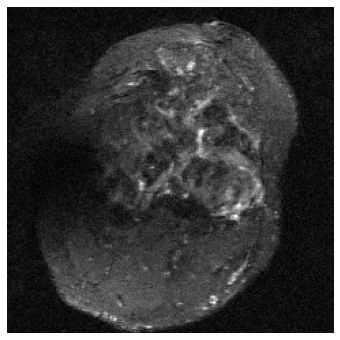

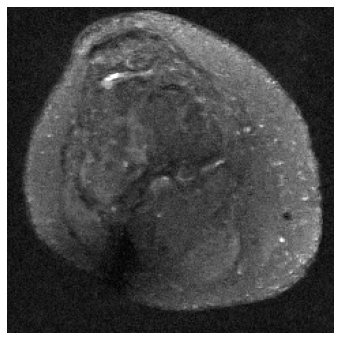

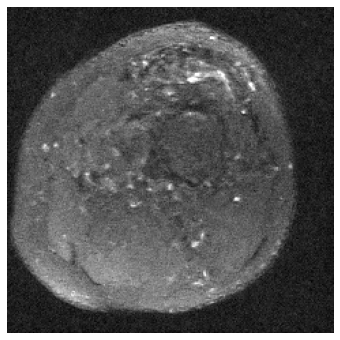

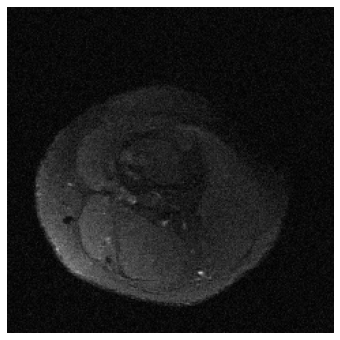

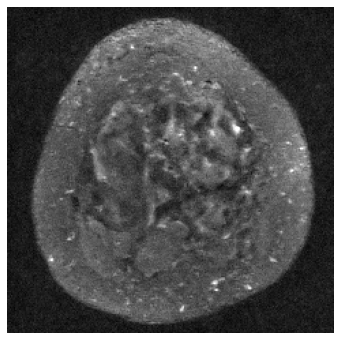

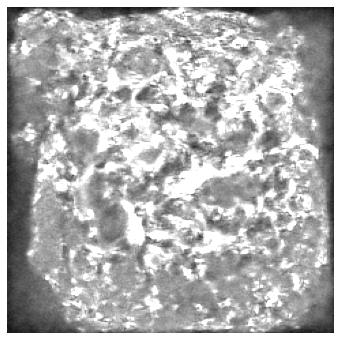

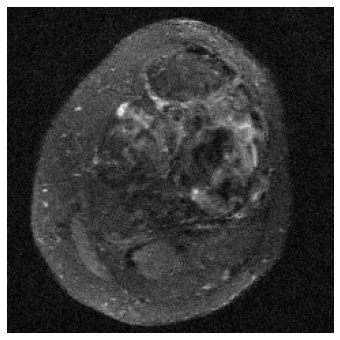

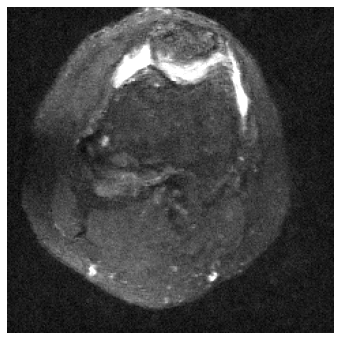

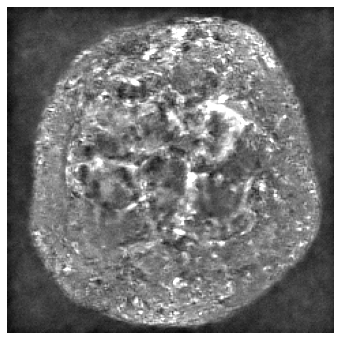

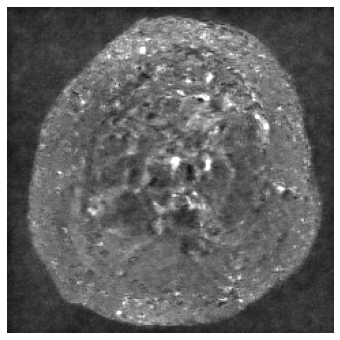

In [50]:
for row in range(10):
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(np.abs(contents['final_images'][row][1]), cmap='gray', vmax=3)

In [6]:
channels = torch.load(sys.path[0] + '/data/mri-data/knee-tea2.pt')['X']

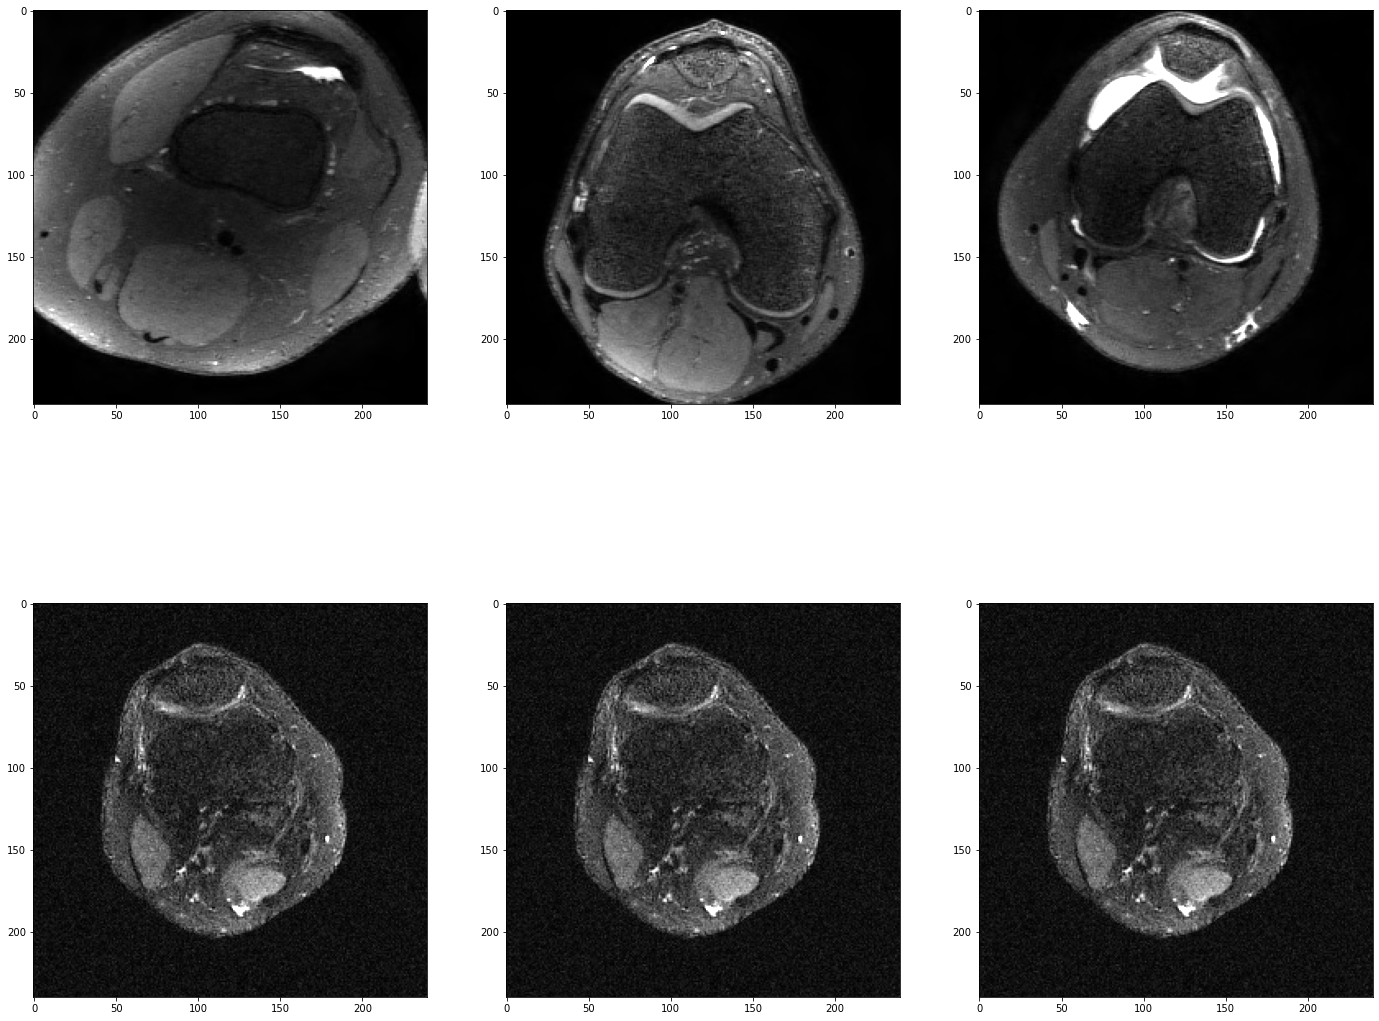

In [82]:
plt.figure(figsize=(24, 20))
s = 2

x = np.random.permutation(len(channels))

for i in range(1, 4):
    plt.subplot(2, 3, i)
    plt.imshow(np.abs(channels[x[i]]), cmap='gray', vmax=s)
    
    plt.subplot(2, 3, i+3)
    plt.imshow(np.abs(contents['final_images'][10][0]), cmap='gray', vmax=2)